In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

In [2]:
feat_file=pd.read_csv('cancer_mordred_preprocessed.csv')

In [3]:
feat_file.head()

,ABC,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE2_A,VR1_A,VR3_A,...,JGI9,JGI10,JGT10,Diameter,TopoShapeIndex,SRW03,SRW05,TSRW10,WPath,mZagreb1
0,0.121378,0.0,0.0,0.165387,0.722883,0.785705,0.625380,0.172377,0.000007,0.325947,...,0.000000,0.000000,0.570573,8.000000e-08,0.60,0.0,0.000000,0.255696,1.210999e-09,0.142857
1,0.187982,0.2,0.2,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.460767,0.614607,0.593865,1.000000e+00,0.00,0.0,0.555084,0.412322,1.242729e-02,0.133016
2,0.161982,0.0,0.0,0.232151,0.766968,0.882304,0.685177,0.152569,0.000011,0.359675,...,0.000000,0.000000,0.431425,8.000000e-08,1.00,0.0,0.000000,0.335127,1.919619e-09,0.125236
3,0.150052,0.1,0.0,0.183974,0.723677,0.830321,0.605608,0.205313,0.001804,0.317939,...,0.000000,0.000000,0.502729,1.000000e+00,0.00,0.0,0.437189,0.361216,1.586462e-02,0.153556
4,0.073037,0.0,0.0,0.115319,0.672574,0.876552,0.525463,0.248485,0.000004,0.264019,...,0.000000,0.000000,0.267857,7.000000e-08,0.75,0.0,0.000000,0.204382,3.516658e-10,0.053493


In [4]:
feat_file.shape

(2129, 820)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 820)

In [10]:
X_train_filtered=pd.read_csv('min_acqui_20(15)_train.csv')

In [11]:
X_train_filtered.head()

,nBase,ATSC0v,Xp-0dv,NdS,MDEN-23,PEOE_VSA5,AATSC8d,AATSC8i,nG12FARing,MAXdsN,GATS4s,AATSC1se,VSA_EState1,MAXaaO,GATS7Z
0,0.0,0.171466,0.182950,0.00,0.132781,0.0,0.351541,0.502423,0.333333,0.475173,0.126346,0.420574,0.008907,0.42314,0.143576
1,0.0,0.094158,0.133395,0.00,0.132781,0.0,0.299770,0.445194,0.000000,0.475173,0.167236,0.468971,0.008907,0.42314,0.143436
2,0.1,0.063312,0.064529,0.00,0.132781,0.0,0.400458,0.548529,0.000000,0.475173,0.114663,0.388369,0.008907,0.42314,0.228654
3,0.0,0.048654,0.051332,0.00,0.132781,0.0,0.382294,0.511714,0.000000,0.475173,0.326235,0.472462,0.010695,0.42314,0.000000
4,0.0,0.171109,0.221569,0.75,0.132781,0.0,0.382294,0.511714,0.000000,0.475173,0.225103,0.424164,0.012451,0.42314,0.149289


In [12]:
X_test_filtered=pd.read_csv('min_acqui_20(15)_test.csv')

In [13]:
X_test_filtered.head()

,nBase,ATSC0v,Xp-0dv,NdS,MDEN-23,PEOE_VSA5,AATSC8d,AATSC8i,nG12FARing,MAXdsN,GATS4s,AATSC1se,VSA_EState1,MAXaaO,GATS7Z
0,0.0,0.025357,0.029414,0.00,0.139991,0.052374,0.382294,0.511714,0.0,0.463410,0.406882,0.525640,0.008907,0.42314,0.149289
1,0.0,0.019413,0.125399,0.00,0.132781,0.250000,0.382294,0.511714,0.0,0.475173,0.225103,0.392016,0.023092,0.42314,0.149289
2,0.0,0.095806,0.166746,0.00,0.132781,0.000000,0.345304,0.531056,0.0,0.475173,0.213444,0.402254,0.080524,0.42314,0.116752
3,0.0,0.041542,0.125399,0.00,0.132781,0.000000,0.382294,0.511714,0.0,0.475173,0.256019,0.359955,0.106851,0.42314,0.000000
4,0.0,0.031785,0.029107,0.25,0.132781,0.000000,0.382294,0.511714,0.0,0.475173,0.000000,0.386335,0.008907,0.42314,0.149289


## RFC

In [14]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values=forest.predict_proba(X_test_filtered)

In [15]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[144  55]
 [ 99 128]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5926    0.7236    0.6516       199
           1     0.6995    0.5639    0.6244       227

    accuracy                         0.6385       426
   macro avg     0.6460    0.6437    0.6380       426
weighted avg     0.6495    0.6385    0.6371       426



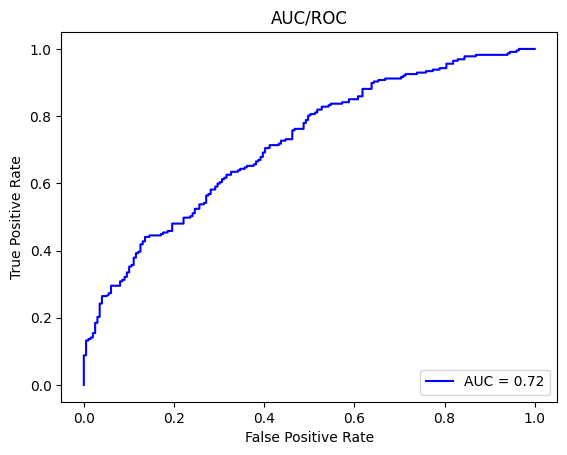

In [16]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)
y_prediction_values=KNN.predict_proba(X_test_filtered)

In [18]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa=knn_kappa_train
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[121  78]
 [ 82 145]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5961    0.6080    0.6020       199
           1     0.6502    0.6388    0.6444       227

    accuracy                         0.6244       426
   macro avg     0.6231    0.6234    0.6232       426
weighted avg     0.6249    0.6244    0.6246       426



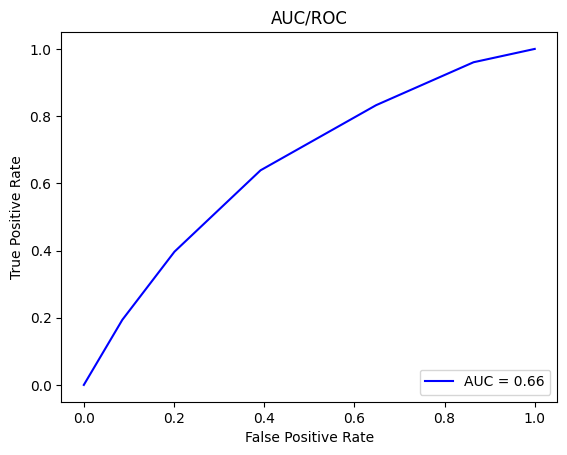

In [19]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [20]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)
y_prediction_values=model.predict_proba(X_test_filtered)

In [21]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa=knn_kappa_train
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[123  76]
 [ 79 148]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6089    0.6181    0.6135       199
           1     0.6607    0.6520    0.6563       227

    accuracy                         0.6362       426
   macro avg     0.6348    0.6350    0.6349       426
weighted avg     0.6365    0.6362    0.6363       426



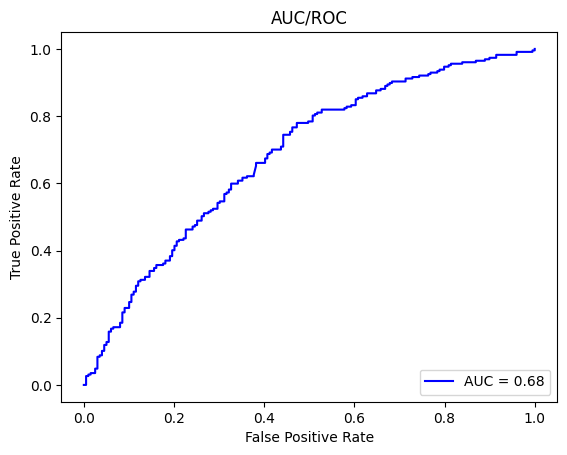

In [22]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)
y_prediction_values=lr.predict_proba(X_test_filtered)

In [24]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa=knn_kappa_train
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[113  86]
 [ 74 153]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6043    0.5678    0.5855       199
           1     0.6402    0.6740    0.6567       227

    accuracy                         0.6244       426
   macro avg     0.6222    0.6209    0.6211       426
weighted avg     0.6234    0.6244    0.6234       426



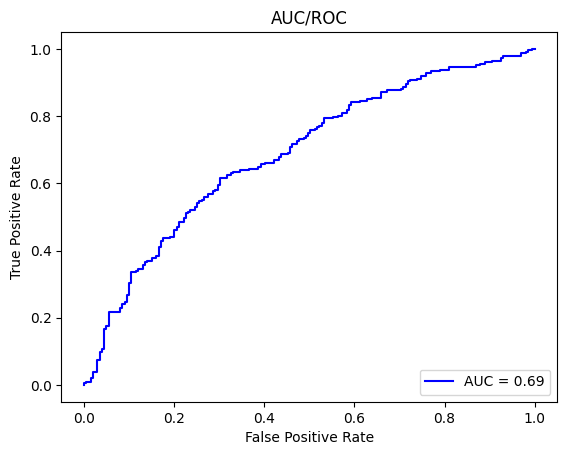

In [25]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values=xgb.predict_proba(X_test_filtered)

[10:55:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [27]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa=knn_kappa_train
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[132  67]
 [ 83 144]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6140    0.6633    0.6377       199
           1     0.6825    0.6344    0.6575       227

    accuracy                         0.6479       426
   macro avg     0.6482    0.6488    0.6476       426
weighted avg     0.6505    0.6479    0.6483       426



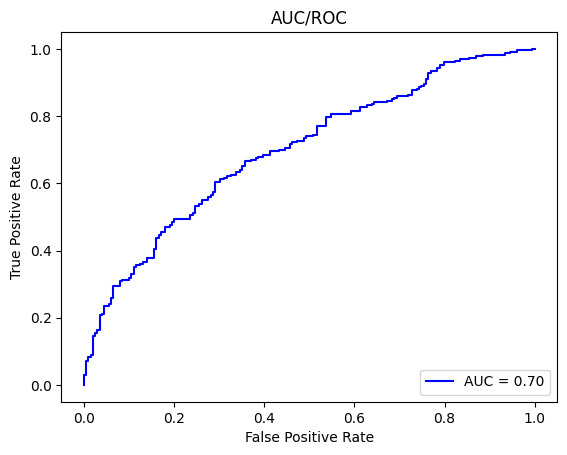

In [28]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values=clf.predict_proba(X_test_filtered)

In [30]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa=knn_kappa_train
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 52 147]
 [ 30 197]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6341    0.2613    0.3701       199
           1     0.5727    0.8678    0.6900       227

    accuracy                         0.5845       426
   macro avg     0.6034    0.5646    0.5301       426
weighted avg     0.6014    0.5845    0.5406       426



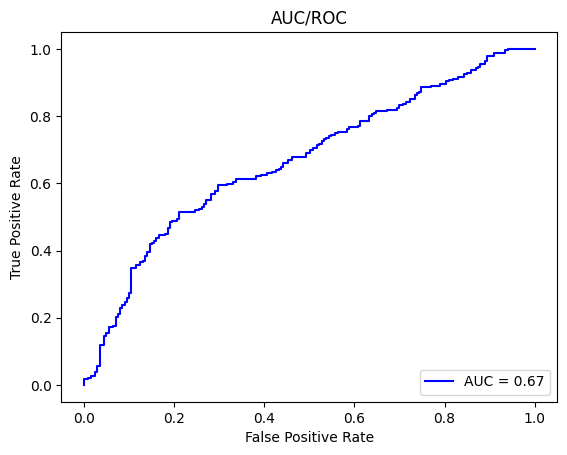

In [31]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values=mlp.predict_proba(X_test_filtered)

In [33]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa=knn_kappa_train
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[123  76]
 [ 79 148]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6089    0.6181    0.6135       199
           1     0.6607    0.6520    0.6563       227

    accuracy                         0.6362       426
   macro avg     0.6348    0.6350    0.6349       426
weighted avg     0.6365    0.6362    0.6363       426



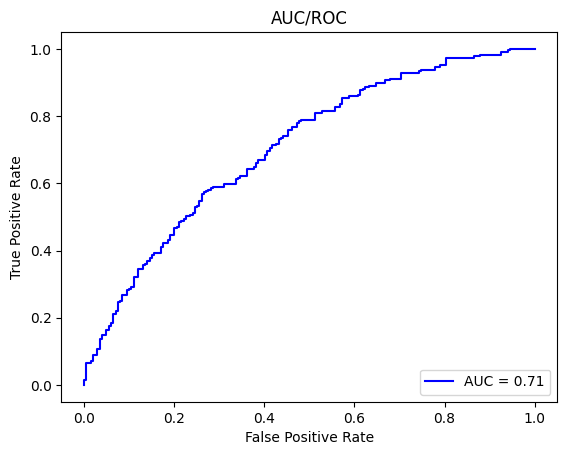

In [34]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values=etc.predict_proba(X_test_filtered)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)
etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
etc_kappa=knn_kappa_train
etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
etc_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[131  68]
 [ 78 149]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6268    0.6583    0.6422       199
           1     0.6866    0.6564    0.6712       227

    accuracy                         0.6573       426
   macro avg     0.6567    0.6573    0.6567       426
weighted avg     0.6587    0.6573    0.6576       426



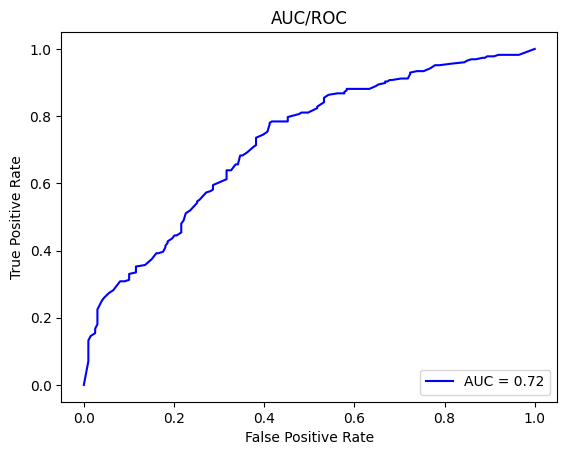

In [37]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [38]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)
y_prediction_values=dtc.predict_proba(X_test_filtered)
                            

In [39]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa=knn_kappa_train
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_kappa=knn_kappa_test
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[ 83 116]
 [ 52 175]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6148    0.4171    0.4970       199
           1     0.6014    0.7709    0.6757       227

    accuracy                         0.6056       426
   macro avg     0.6081    0.5940    0.5863       426
weighted avg     0.6077    0.6056    0.5922       426



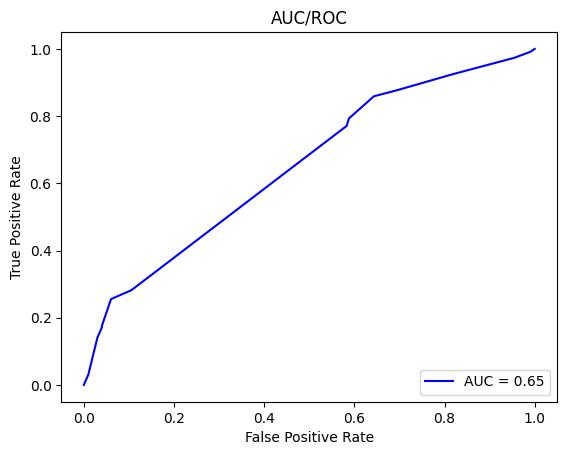

In [40]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)
y_prediction_values=lda.predict_proba(X_test_filtered)
                            

In [42]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)
lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lda_kappa=knn_kappa_train
lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lda_kappa=knn_kappa_test

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[115  84]
 [ 78 149]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5959    0.5779    0.5867       199
           1     0.6395    0.6564    0.6478       227

    accuracy                         0.6197       426
   macro avg     0.6177    0.6171    0.6173       426
weighted avg     0.6191    0.6197    0.6193       426



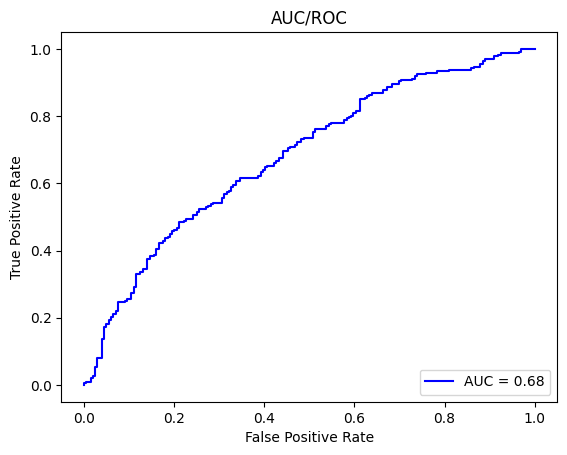

In [43]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [44]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
df_train = pd.DataFrame(data_train)

In [45]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa],
               'AUC/ROC':[auc_1,auc_2,auc_3,auc_4,auc_5,auc_6,auc_7,auc_8,auc_9,auc_10]}
             
             
df_test = pd.DataFrame(data_test)             

In [46]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC
0,RFC,72.695244,0.460967,0.726408,0.774667,0.662486,0.455847,0.719202
1,KNN,77.099237,0.541772,0.770860,0.780854,0.771950,0.541735,0.656476
2,SVC,65.942454,0.317845,0.658832,0.665552,0.680730,0.317757,0.682974
3,LR,65.472695,0.308759,0.651613,0.646403,0.727480,0.306147,0.687889
4,XGB,93.188491,0.863648,0.931824,0.933865,0.933865,0.863648,0.698293
5,GNB,58.896066,0.197762,0.546157,0.565604,0.870011,0.163281,0.666881
6,MLP,66.059894,0.320199,0.660008,0.666667,0.681870,0.320110,0.705886
7,ETC,99.530241,0.990609,0.995299,0.997709,0.993158,0.990598,0.724149
8,DTC,65.120376,0.316327,0.634793,0.619208,0.838084,0.294078,0.650997
9,LDA,64.298297,0.284548,0.641672,0.644779,0.683010,0.284014,0.680982


In [47]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC
0,RFC,63.849765,0.289762,0.637987,0.699454,0.563877,0.283627,0.719202
1,KNN,62.441315,0.246545,0.623217,0.650224,0.638767,0.246501,0.656476
2,SVC,63.615023,0.269849,0.634893,0.660714,0.651982,0.269822,0.682974
3,LR,62.441315,0.243143,0.621072,0.640167,0.674009,0.242751,0.687889
4,XGB,64.788732,0.297047,0.647608,0.682464,0.634361,0.296209,0.698293
5,GNB,58.450704,0.163433,0.530062,0.572674,0.867841,0.134007,0.666881
6,MLP,63.615023,0.269849,0.634893,0.660714,0.651982,0.269822,0.705886
7,ETC,65.727700,0.314054,0.656664,0.686636,0.656388,0.313707,0.724149
8,DTC,60.563380,0.201608,0.586341,0.601375,0.770925,0.191815,0.650997
9,LDA,61.971831,0.234808,0.617280,0.639485,0.656388,0.246501,0.680982
